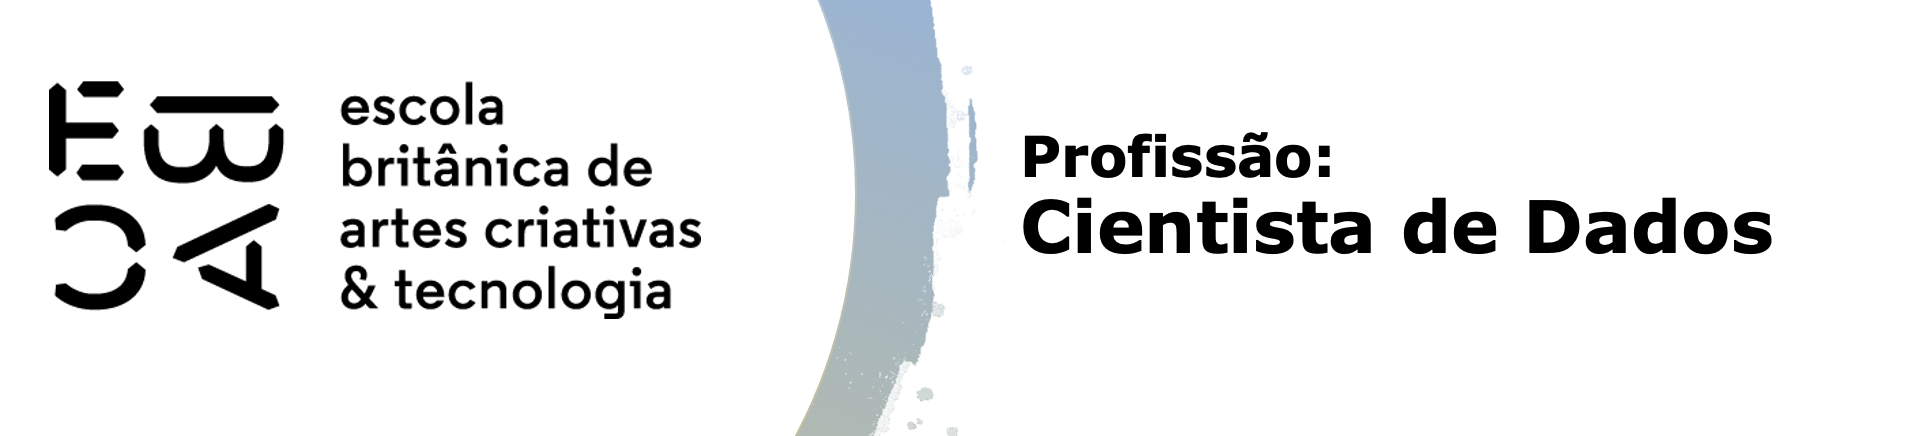

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [5]:
# train
X_train = pd.read_csv('X_train.csv', index_col=[0, 1])
y_train = pd.read_csv('y_train.csv', index_col=[0, 1])

# test
y_test = pd.read_csv('y_test.csv', index_col=[0, 1])
X_test = pd.read_csv('X_test.csv', index_col=[0, 1])

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [7]:
X_train_cut = X_train[['57 tGravityAcc-energy()-X', '272 fBodyAcc-mad()-X', '560 angle(Y,gravityMean)']]
X_test_cut = X_test[['57 tGravityAcc-energy()-X', '272 fBodyAcc-mad()-X', '560 angle(Y,gravityMean)']]

In [8]:
%%time
path = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(X_train_cut, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])
ccp_alphas

CPU times: total: 0 ns
Wall time: 8.18 ms


array([0.00000000e+00, 1.23777219e-07, 5.44995104e-06, 6.96674540e-06,
       7.04310757e-06, 7.64604257e-06, 9.48000132e-06, 9.51056033e-06,
       9.97461008e-06, 1.10593595e-05, 1.82436050e-05, 2.47390551e-05,
       2.96765259e-05, 3.15544286e-05, 3.69307877e-05, 4.13966031e-05,
       4.21966508e-05, 4.28992423e-05, 4.30345917e-05, 4.47114668e-05,
       4.81847368e-05, 5.65298725e-05, 7.43974017e-05, 7.46394346e-05,
       9.95342357e-05, 1.01414741e-04, 1.05808019e-04, 1.14291646e-04,
       1.15454021e-04, 1.18099044e-04, 1.43841650e-04, 1.45377194e-04,
       1.46294281e-04, 1.47480999e-04, 1.48539648e-04, 1.53923437e-04,
       1.60950034e-04, 1.81356547e-04, 1.82654479e-04, 1.84942191e-04,
       1.88245495e-04, 2.16923939e-04, 2.30290224e-04, 2.36660329e-04,
       2.38030468e-04, 2.57159008e-04, 2.92192569e-04, 3.03395883e-04,
       3.05145852e-04, 3.47695174e-04, 3.49555233e-04, 3.82394401e-04,
       4.09597883e-04, 4.30145143e-04, 4.33681949e-04, 4.67793797e-04,
      

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [10]:
%%time
clf = DecisionTreeClassifier(random_state=2360873)
# grid_parametros = {'ccp_alpha': ccp_alphas[::5]}
# grid_parametros = {'ccp_alpha': ccp_alphas[::10]}
grid_parametros = {'ccp_alpha': ccp_alphas}
grid_parametros

CPU times: total: 0 ns
Wall time: 0 ns


{'ccp_alpha': array([0.00000000e+00, 1.23777219e-07, 5.44995104e-06, 6.96674540e-06,
        7.04310757e-06, 7.64604257e-06, 9.48000132e-06, 9.51056033e-06,
        9.97461008e-06, 1.10593595e-05, 1.82436050e-05, 2.47390551e-05,
        2.96765259e-05, 3.15544286e-05, 3.69307877e-05, 4.13966031e-05,
        4.21966508e-05, 4.28992423e-05, 4.30345917e-05, 4.47114668e-05,
        4.81847368e-05, 5.65298725e-05, 7.43974017e-05, 7.46394346e-05,
        9.95342357e-05, 1.01414741e-04, 1.05808019e-04, 1.14291646e-04,
        1.15454021e-04, 1.18099044e-04, 1.43841650e-04, 1.45377194e-04,
        1.46294281e-04, 1.47480999e-04, 1.48539648e-04, 1.53923437e-04,
        1.60950034e-04, 1.81356547e-04, 1.82654479e-04, 1.84942191e-04,
        1.88245495e-04, 2.16923939e-04, 2.30290224e-04, 2.36660329e-04,
        2.38030468e-04, 2.57159008e-04, 2.92192569e-04, 3.03395883e-04,
        3.05145852e-04, 3.47695174e-04, 3.49555233e-04, 3.82394401e-04,
        4.09597883e-04, 4.30145143e-04, 4.33681949e

In [24]:
%time
grid = GridSearchCV(estimator=clf, param_grid=grid_parametros, cv=10, verbose=100)
grid.fit(X_train_cut, y_train)

CPU times: total: 0 ns
Wall time: 0 ns
Fitting 10 folds for each of 107 candidates, totalling 1070 fits
[CV 1/10; 1/107] START ccp_alpha=0.0............................................
[CV 1/10; 1/107] END .............ccp_alpha=0.0;, score=0.791 total time=   0.0s
[CV 2/10; 1/107] START ccp_alpha=0.0............................................
[CV 2/10; 1/107] END .............ccp_alpha=0.0;, score=0.751 total time=   0.0s
[CV 3/10; 1/107] START ccp_alpha=0.0............................................
[CV 3/10; 1/107] END .............ccp_alpha=0.0;, score=0.793 total time=   0.0s
[CV 4/10; 1/107] START ccp_alpha=0.0............................................
[CV 4/10; 1/107] END .............ccp_alpha=0.0;, score=0.678 total time=   0.0s
[CV 5/10; 1/107] START ccp_alpha=0.0............................................
[CV 5/10; 1/107] END .............ccp_alpha=0.0;, score=0.790 total time=   0.0s
[CV 6/10; 1/107] START ccp_alpha=0.0............................................
[CV 6

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=2360873),
             param_grid={'ccp_alpha': array([0.00000000e+00, 1.23777219e-07, 5.44995104e-06, 6.96674540e-06,
       7.04310757e-06, 7.64604257e-06, 9.48000132e-06, 9.51056033e-06,
       9.97461008e-06, 1.10593595e-05, 1.82436050e-05, 2.47390551e-05,
       2.96765259e-05, 3.15544286e-05, 3.69307877e-05, 4.13966031e-05,
       4.219...
       1.67487823e-03, 1.78389909e-03, 1.93520433e-03, 2.00403134e-03,
       2.09941305e-03, 2.30144574e-03, 2.40743372e-03, 2.49787393e-03,
       2.62823385e-03, 2.65096886e-03, 3.09222797e-03, 3.81607263e-03,
       4.29651934e-03, 4.90778373e-03, 5.38489539e-03, 6.98899314e-03,
       7.14303075e-03, 1.03332221e-02, 3.47995139e-02, 7.61968072e-02,
       1.09363718e-01, 1.67221582e-01, 1.85811143e-01])},
             verbose=100)

In [25]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.045045,0.010034,0.001101,0.002214,0.0,{'ccp_alpha': 0.0},0.790761,0.751359,0.793197,0.677551,0.790476,0.768707,0.802721,0.77551,0.820408,0.767347,0.773804,0.037133,63
1,0.036363,0.007392,0.008312,0.007612,0.0,{'ccp_alpha': 1.2377721861031067e-07},0.790761,0.751359,0.793197,0.677551,0.790476,0.768707,0.802721,0.77551,0.820408,0.767347,0.773804,0.037133,63
2,0.040773,0.003184,0.005621,0.003542,0.000005,{'ccp_alpha': 5.449951042985827e-06},0.790761,0.751359,0.793197,0.677551,0.790476,0.768707,0.802721,0.77551,0.820408,0.767347,0.773804,0.037133,63
3,0.039221,0.001740,0.004492,0.000687,0.000007,{'ccp_alpha': 6.966745401948242e-06},0.790761,0.751359,0.793197,0.677551,0.790476,0.768707,0.802721,0.77551,0.820408,0.767347,0.773804,0.037133,63
4,0.039841,0.003568,0.004760,0.000858,0.000007,{'ccp_alpha': 7.043107569088057e-06},0.790761,0.751359,0.793197,0.677551,0.790476,0.768707,0.802721,0.77551,0.820408,0.767347,0.773804,0.037133,63


In [26]:
print(grid.best_index_)
print(grid.best_params_)
print(grid.best_score_)

96
{'ccp_alpha': 0.0042965193422309055}
0.8248042369121562


### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [28]:

melhor_ccp = resultados.iloc[grid.best_index_, 4]
clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=melhor_ccp).fit(X_train_cut, y_train)
clf.score(X_test_cut, y_test)

0.7241262300644723

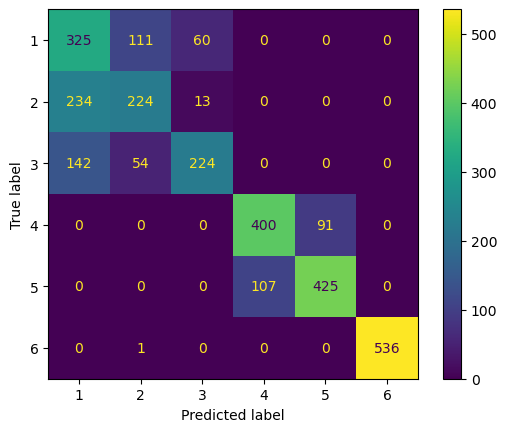

In [29]:
ConfusionMatrixDisplay.from_estimator(clf, X_test_cut, y_test)

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [31]:
y_train_dummy = pd.get_dummies(y_train['0'])
# y_train_dummy
y_train_cut = y_train_dummy[2].to_frame()
y_train_cut

,,2
,Subject,
0,1,False
1,1,False
2,1,False
3,1,False
4,1,False
...,...,...
7347,30,True
7348,30,True
7349,30,True


In [32]:
clf = DecisionTreeClassifier(random_state=230873, min_samples_leaf=20, max_depth=4).fit(X_train, y_train_cut)
importancia_das_variaveis = pd.Series(clf.feature_importances_, index=X_train.columns)
importancia_das_variaveis.sort_values(ascending=False, inplace=True)
importancia_das_variaveis

74 tGravityAcc-arCoeff()-Z,1        0.336087
331 fBodyAcc-bandsEnergy()-1,8      0.308642
560 angle(Y,gravityMean)            0.116120
469 fBodyGyro-bandsEnergy()-1,16    0.066982
517 fBodyBodyAccJerkMag-std()       0.048027
                                      ...   
186 tBodyGyroJerk-arCoeff()-X,1     0.000000
185 tBodyGyroJerk-entropy()-Z       0.000000
184 tBodyGyroJerk-entropy()-Y       0.000000
183 tBodyGyroJerk-entropy()-X       0.000000
561 angle(Z,gravityMean)            0.000000
Length: 561, dtype: float64

In [33]:
X_train_cut = X_train[['74 tGravityAcc-arCoeff()-Z,1', '331 fBodyAcc-bandsEnergy()-1,8', '560 angle(Y,gravityMean)']]
X_test_cut = X_test[['74 tGravityAcc-arCoeff()-Z,1', '331 fBodyAcc-bandsEnergy()-1,8', '560 angle(Y,gravityMean)']]

In [34]:
path = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(X_train_cut, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])
ccp_alphas

array([0.00000000e+00, 7.19668837e-06, 8.37030217e-06, 9.28372800e-06,
       9.29704442e-06, 9.41658994e-06, 9.60122896e-06, 9.95105729e-06,
       1.07972583e-05, 1.14254625e-05, 2.09201678e-05, 2.17679098e-05,
       2.18878591e-05, 3.39160296e-05, 3.46226135e-05, 4.24493896e-05,
       4.36345062e-05, 4.68059912e-05, 4.90989676e-05, 5.09274489e-05,
       5.25654728e-05, 5.47032735e-05, 5.69487036e-05, 6.13005269e-05,
       6.47070049e-05, 7.21304448e-05, 7.29219616e-05, 7.34139044e-05,
       7.51360542e-05, 7.68098317e-05, 7.69553048e-05, 7.87249399e-05,
       8.44412920e-05, 8.70018535e-05, 8.78087249e-05, 9.43886804e-05,
       9.95342357e-05, 1.09178427e-04, 1.30808670e-04, 1.31757006e-04,
       1.31844449e-04, 1.32487726e-04, 1.39314802e-04, 1.40294601e-04,
       1.40435689e-04, 1.42984456e-04, 1.50225858e-04, 1.54565239e-04,
       1.55448469e-04, 1.56351676e-04, 1.62057845e-04, 1.62168490e-04,
       1.68717458e-04, 1.69097013e-04, 1.74158127e-04, 1.74168635e-04,
      

In [35]:
grid_parametros = {'ccp_alpha': ccp_alphas}
grid_parametros

{'ccp_alpha': array([0.00000000e+00, 7.19668837e-06, 8.37030217e-06, 9.28372800e-06,
        9.29704442e-06, 9.41658994e-06, 9.60122896e-06, 9.95105729e-06,
        1.07972583e-05, 1.14254625e-05, 2.09201678e-05, 2.17679098e-05,
        2.18878591e-05, 3.39160296e-05, 3.46226135e-05, 4.24493896e-05,
        4.36345062e-05, 4.68059912e-05, 4.90989676e-05, 5.09274489e-05,
        5.25654728e-05, 5.47032735e-05, 5.69487036e-05, 6.13005269e-05,
        6.47070049e-05, 7.21304448e-05, 7.29219616e-05, 7.34139044e-05,
        7.51360542e-05, 7.68098317e-05, 7.69553048e-05, 7.87249399e-05,
        8.44412920e-05, 8.70018535e-05, 8.78087249e-05, 9.43886804e-05,
        9.95342357e-05, 1.09178427e-04, 1.30808670e-04, 1.31757006e-04,
        1.31844449e-04, 1.32487726e-04, 1.39314802e-04, 1.40294601e-04,
        1.40435689e-04, 1.42984456e-04, 1.50225858e-04, 1.54565239e-04,
        1.55448469e-04, 1.56351676e-04, 1.62057845e-04, 1.62168490e-04,
        1.68717458e-04, 1.69097013e-04, 1.74158127e

In [36]:
%time
grid = GridSearchCV(estimator=clf, param_grid=grid_parametros, cv=10, verbose=100)
grid.fit(X_train_cut, y_train)

CPU times: total: 0 ns
Wall time: 0 ns
Fitting 10 folds for each of 155 candidates, totalling 1550 fits
[CV 1/10; 1/155] START ccp_alpha=0.0............................................
[CV 1/10; 1/155] END .............ccp_alpha=0.0;, score=0.736 total time=   0.0s
[CV 2/10; 1/155] START ccp_alpha=0.0............................................
[CV 2/10; 1/155] END .............ccp_alpha=0.0;, score=0.666 total time=   0.0s
[CV 3/10; 1/155] START ccp_alpha=0.0............................................
[CV 3/10; 1/155] END .............ccp_alpha=0.0;, score=0.765 total time=   0.0s
[CV 4/10; 1/155] START ccp_alpha=0.0............................................
[CV 4/10; 1/155] END .............ccp_alpha=0.0;, score=0.683 total time=   0.0s
[CV 5/10; 1/155] START ccp_alpha=0.0............................................
[CV 5/10; 1/155] END .............ccp_alpha=0.0;, score=0.680 total time=   0.0s
[CV 6/10; 1/155] START ccp_alpha=0.0............................................
[CV 6

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=4, min_samples_leaf=20,
                                              random_state=230873),
             param_grid={'ccp_alpha': array([0.00000000e+00, 7.19668837e-06, 8.37030217e-06, 9.28372800e-06,
       9.29704442e-06, 9.41658994e-06, 9.60122896e-06, 9.95105729e-06,
       1.07972583e-05, 1.14254625e-05, 2.09201678e-05, 2.17679098e-05,
       2.18878591e-05, 3.39160296e-05, 3.46...
       1.69833246e-03, 1.86692717e-03, 2.01557477e-03, 2.12283697e-03,
       2.16084523e-03, 2.20930845e-03, 2.35069870e-03, 2.36431635e-03,
       3.09119646e-03, 3.58248245e-03, 3.91660022e-03, 4.37519168e-03,
       4.69324870e-03, 5.58582624e-03, 5.86826917e-03, 9.81054832e-03,
       1.23984005e-02, 1.30967215e-02, 1.45801317e-02, 7.21080616e-02,
       9.23777805e-02, 1.30190858e-01, 1.51954066e-01])},
             verbose=100)

In [37]:
resultados = pd.DataFrame(grid.cv_results_)
resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024040,0.006890,0.002234,0.002298,0.0,{'ccp_alpha': 0.0},0.736413,0.665761,0.764626,0.682993,0.680272,0.795918,0.733333,0.829932,0.760544,0.806803,0.745660,0.053639,33
1,0.023341,0.004716,0.004526,0.004927,0.000007,{'ccp_alpha': 7.196688371879304e-06},0.736413,0.665761,0.764626,0.682993,0.680272,0.795918,0.733333,0.829932,0.760544,0.806803,0.745660,0.053639,33
2,0.020324,0.005761,0.004561,0.005981,0.000008,{'ccp_alpha': 8.370302167908699e-06},0.736413,0.665761,0.764626,0.682993,0.680272,0.795918,0.733333,0.829932,0.760544,0.806803,0.745660,0.053639,33
3,0.024186,0.007104,0.000586,0.001173,0.000009,{'ccp_alpha': 9.283727999723885e-06},0.736413,0.665761,0.764626,0.682993,0.680272,0.795918,0.733333,0.829932,0.760544,0.806803,0.745660,0.053639,33
4,0.019968,0.005148,0.003317,0.004988,0.000009,{'ccp_alpha': 9.297044420067575e-06},0.736413,0.665761,0.764626,0.682993,0.680272,0.795918,0.733333,0.829932,0.760544,0.806803,0.745660,0.053639,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.023580,0.008270,0.005342,0.005847,0.01458,{'ccp_alpha': 0.014580131653917416},0.725543,0.634511,0.753741,0.672109,0.658503,0.764626,0.658503,0.744218,0.727891,0.742857,0.708250,0.044852,151
151,0.028020,0.006125,0.002020,0.002123,0.072108,{'ccp_alpha': 0.07210806156623584},0.629076,0.634511,0.627211,0.663946,0.571429,0.759184,0.548299,0.635374,0.605442,0.610884,0.628536,0.053806,152
152,0.018760,0.008154,0.005366,0.006485,0.092378,{'ccp_alpha': 0.09237778050217074},0.516304,0.593750,0.497959,0.565986,0.571429,0.537415,0.548299,0.517007,0.489796,0.610884,0.544883,0.038460,153
153,0.022796,0.007952,0.001462,0.003101,0.130191,{'ccp_alpha': 0.1301908581477605},0.346467,0.493207,0.497959,0.497959,0.507483,0.352381,0.431293,0.517007,0.489796,0.348299,0.448185,0.068376,154


In [38]:
print(grid.best_index_)
print(grid.best_params_)
print(grid.best_score_)

128
{'ccp_alpha': 0.0014383249875101478}
0.7504214729370009


In [39]:
melhor_ccp = resultados.iloc[grid.best_index_, 4]
clf = DecisionTreeClassifier(random_state=230873, ccp_alpha=melhor_ccp).fit(X_train_cut, y_train)
clf.score(X_test_cut, y_test)

0.6559212758737699

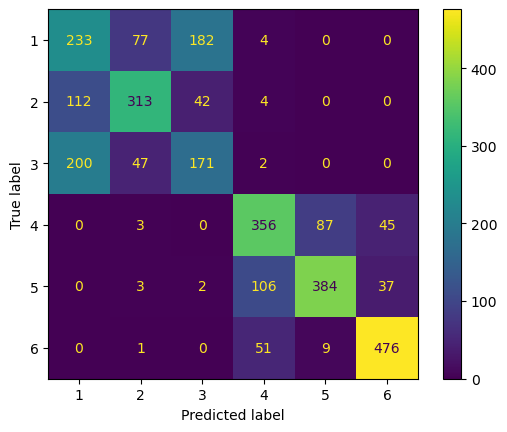

In [40]:
ConfusionMatrixDisplay.from_estimator(clf, X_test_cut, y_test)

In [41]:
acuracia_1 = 224/(234+224+13)
print(f"{acuracia_1*100:.2f}%")

47.56%


In [42]:
acuracia_2 = 291/(123+291+57)
print(f"{acuracia_2*100:.2f}%")

61.78%
